In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import pyfar as pf
%matplotlib inline

In [2]:
OUT_DIR = os.path.join(os.getcwd(),"out")

SRC_DIR = os.path.join("C:\\Users\\jotag\\OneDrive - Universita' degli Studi della Campania Luigi Vanvitelli\\jasapaper")

### figure formatting

In [ ]:
font={
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 11,
}

plt.rcParams.update(font)

def create_fig():
    figure,ax = plt.subplots(figsize=(4,2.5))
    plt.grid()
    return figure, ax

def export_fig(fig, filename,out_dir=OUT_DIR, fformat=".pdf"):
    fig.savefig(os.path.join(out_dir,filename+fformat), bbox_inches='tight')

tlabel="$$rt \\quad [\\mathrm{s}]$$"
mlabel="peak memory [MiB]"
mlegend=["scene definition","geometry baking", "energy exchange","collection"]
tlegend=["scene definition","geometry baking", "energy exchange","collection"]

In [4]:
# get file from
with open(os.path.join(SRC_DIR,"urban_canyon_with_mem.json")) as json_file:
    dat = json.load(json_file)

## time step

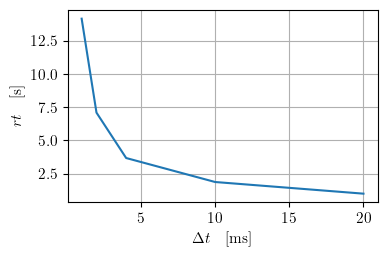

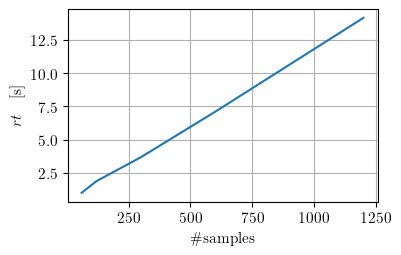

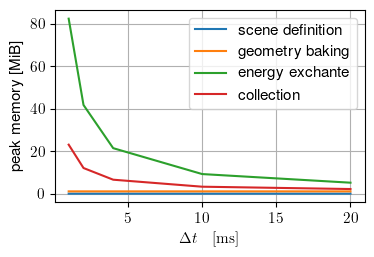

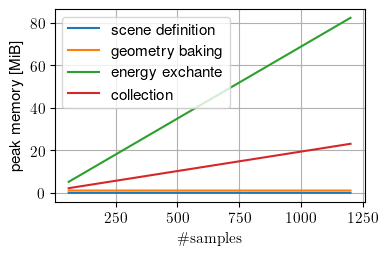

In [ ]:
t = np.array(dat["time_step"]["t"])
d = np.array(dat["time_step"]["data"])
m = np.array(dat["time_step"]["mem"])[:,:,1]/1024**2
n = 1.2/d

f,a=create_fig()
plt.plot(d*1000,t)
plt.xlabel("$$\\Delta t \\quad [\\mathrm{ms}]$$")
plt.ylabel(tlabel)
plt.legend(tlegend)
plt.show()

fn,a=create_fig()
plt.plot(n,t)
plt.xlabel("$$\\mathrm{\\#samples}$$")
plt.ylabel(tlabel)
plt.legend(tlegend)
plt.show()

fm,a=create_fig()
plt.plot(d*1000,m)
plt.xlabel("$$\\Delta t \\quad [\\mathrm{ms}]$$")
plt.ylabel(mlabel)
plt.legend(mlegend)
plt.show()

fmn,a=create_fig()
plt.plot(n,m)
plt.xlabel("$$\\mathrm{\\#samples}$$")
plt.ylabel(mlabel)
plt.legend(mlegend)
plt.show()

## BRDF resolution

C:\Users\jotag\AppData\Local\Temp\ipykernel_5740\1739005124.py:6: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.equal_angle.'
  samples = pf.samplings.sph_equal_angle(delta_angles=dd)


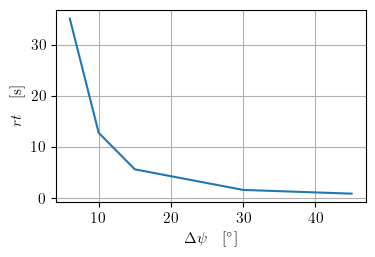

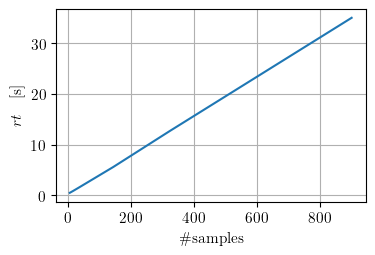

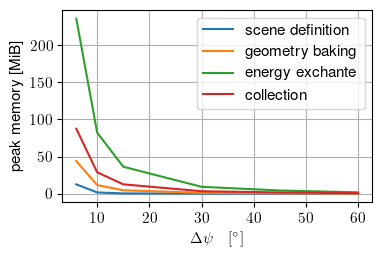

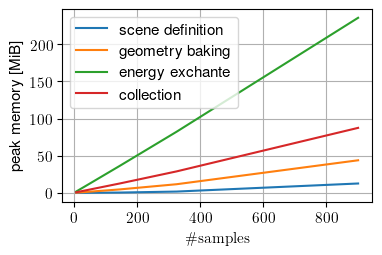

In [ ]:
t = np.array(dat["brdf_resolution"]["t"])
d = np.array(dat["brdf_resolution"]["data"])
m = np.array(dat["brdf_resolution"]["mem"])[:,:,1]/1024**2
n=[]
for dd in d:
    samples = pf.samplings.sph_equal_angle(delta_angles=dd)
    n.append(samples[np.where((samples.elevation*180/np.pi >= 0))].cshape[0])

n=np.array(n)

f,a=create_fig()
plt.plot(d[1:],t[1:])
plt.xlabel("$$\\Delta \\psi \\quad [^{\\circ}]$$")
plt.ylabel(tlabel)
plt.legend(tlegend)
plt.show()

fn,a=create_fig()
plt.plot(n,t)
plt.xlabel("$$\\mathrm{\\#samples}$$")
plt.ylabel(tlabel)
plt.legend(tlegend)
plt.show()

fm,a=create_fig()
plt.plot(d,m)
plt.xlabel("$$\\Delta \\psi \\quad [^{\\circ}]$$")
plt.ylabel(mlabel)
plt.legend(mlegend)
plt.show()

fmn,a=create_fig()
plt.plot(n,m)
plt.xlabel("$$\\mathrm{\\#samples}$$")
plt.ylabel(mlabel)
plt.legend(mlegend)
plt.show()


## reflection order

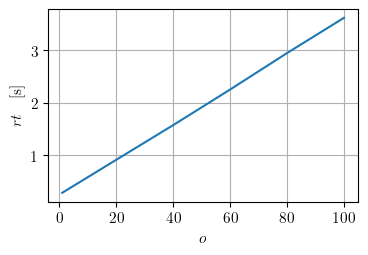

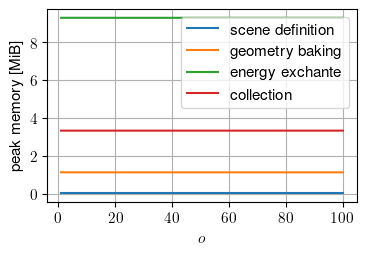

In [ ]:
t = np.array(dat["reflection_order"]["t"])
d = np.array(dat["reflection_order"]["data"])
m = np.array(dat["reflection_order"]["mem"])[:,:,1]/1024**2

f,a=create_fig()
plt.plot(d,t)
plt.xlabel("$$o$$")
plt.ylabel(tlabel)
plt.legend(tlegend)
plt.show()

fm,a=create_fig()
plt.plot(d,m)
plt.xlabel("$$o$$")
plt.ylabel(mlabel)
plt.legend(mlegend)
plt.show()

## patch size

In [ ]:
t = np.array(dat["patch_size"]["t"])
d = np.array(dat["patch_size"]["data"])**2
m = np.array(dat["patch_size"]["mem"])[:,:,1]/1024**2
n = (6*2+12)*90/d

n=np.array(n)

f,a=create_fig()
plt.semilogx(d,t)
plt.xlabel("$$\\Delta S$$")
plt.ylabel(tlabel)
plt.legend(tlegend)
plt.show()

fn,a=create_fig()
plt.plot(n,t)
plt.xlabel("$$\\mathrm{\\#patches}$$")
plt.ylabel(tlabel)
plt.legend(tlegend)
plt.show()

fm,a=create_fig()
plt.plot(d,m)
plt.xlabel("$$\\Delta S$$")
plt.ylabel(mlabel)
plt.legend(mlegend)
plt.show()

fm,a=create_fig()
plt.plot(n,m)
plt.xlabel("$$\\mathrm{\\#patches}$$")
plt.ylabel(mlabel)
plt.legend(mlegend)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed